### Analyzing the New York Times comments section

For this assignment, inspect the <a href="https://developer.nytimes.com/">NYT API</a>, specifically their API for article comments. We'll be completing two major tasks:
- find out where people are commenting from 
- get the most common words from a specific comment 

In [157]:
# import requests and json
import requests
import json
# put your custom settings for the API call here
# you MUST provide an API key, offset value, and article URL
# get your api key from here: https://developer.nytimes.com/
api_key = "lWJSJGMO7YOSK0sNv95fOEoOD5DPP26H"
offset = str(0)
article_url = "https://www.nytimes.com/2020/06/12/opinion/sunday/floyd-protests-white-supremacy.html"
sort = "reader"

# show the API url with all the settings listed out
api_url = "https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=%s&offset=%s&sort=%s&url=%s" %(api_key, offset, sort, article_url)
print(api_url)

https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=lWJSJGMO7YOSK0sNv95fOEoOD5DPP26H&offset=0&sort=reader&url=https://www.nytimes.com/2020/06/12/opinion/sunday/floyd-protests-white-supremacy.html


In [158]:
# calling the API with requests
response = requests.get(api_url)
# creating a variable called data to hold the json formatted result
data = response.json()

In [159]:
# look at all of the data
# it's a lot of nested dictionaries!
print(type(data))
data

<class 'dict'>


{'debug': {'version': 4, 'nyt-com-shim': True},
 'status': 'OK',
 'copyright': 'Copyright (c) 2020 The New York Times Company.  All Rights Reserved.',
 'results': {'callerID': None,
  'api_timestamp': '1606401716',
  'comments': [{'commentID': 107564420,
    'status': 'approved',
    'commentSequence': 107564420,
    'userID': 72595694,
    'userDisplayName': 'JM',
    'userLocation': 'New York',
    'userTitle': 'NULL',
    'userURL': 'NULL',
    'picURL': None,
    'commentTitle': '<br\\//>',
    'commentBody': '"What’s more, as election season begins in earnest, Americans are going to the ballot box as well." Sustaining this momentum will be absolutely essential: Trump and every elected official who supports him, from local dog-catcher to US Senator, must be vanquished at the polls.',
    'createDate': '1591956558',
    'updateDate': '1593964903',
    'approveDate': '1591956558',
    'recommendations': 674,
    'replyCount': 13,
    'replies': [{'commentID': 107566999,
      'status

In [160]:
# isolate just the comments dictionary
comments = data['results']['comments']
print(comments)

[{'commentID': 107564420, 'status': 'approved', 'commentSequence': 107564420, 'userID': 72595694, 'userDisplayName': 'JM', 'userLocation': 'New York', 'userTitle': 'NULL', 'userURL': 'NULL', 'picURL': None, 'commentTitle': '<br\\//>', 'commentBody': '"What’s more, as election season begins in earnest, Americans are going to the ballot box as well." Sustaining this momentum will be absolutely essential: Trump and every elected official who supports him, from local dog-catcher to US Senator, must be vanquished at the polls.', 'createDate': '1591956558', 'updateDate': '1593964903', 'approveDate': '1591956558', 'recommendations': 674, 'replyCount': 13, 'replies': [{'commentID': 107566999, 'status': 'approved', 'commentSequence': 107566999, 'userID': 34609658, 'userDisplayName': 'Kristina', 'userLocation': 'DC', 'userTitle': 'NULL', 'userURL': 'NULL', 'picURL': None, 'commentTitle': '<br\\//>', 'commentBody': "@JM \n\nDid you see what happened in Georgia this week?  In Wisconsin?  Yes, voti

In [161]:
# look at just one of the comments
userComment= [isolate['commentBody'] for isolate in comments]
oneComment= userComment[2]
print(oneComment)

In the outskirts of the city of Budapest, Hungary there’s a large park dedicated to obsolete statuary from the Soviet era. It’s called the Statue Park. All the old public sculpture is there in close proximity to one another with walkways among them and signage explaining where they stood and whom they’re commemorating, putting them all in historical context. It’s basically a cemetery and museum for the obsolete ideas they represented. Some of them were and are real pieces of art, others are rather mediocre, but all representing a bygone era of bad ideas and systems. It is sad to note that Hungary has moved away from the highly cherished idea of democracy that created this park in the first heady days of freedom in the last century.


In [162]:
# lowercase the comment and remove punctuation

# comments=str(comments)

oneComment=str(oneComment)

# comments = comments.lower()
oneComment = oneComment.lower() 

# # comments= comments.replace(' ', '')
# CommentClean = userCommentLC.replace(',', '').replace('.',"").replace("''", "")

print(oneComment)
# you can use the code we wrote for the lexical richness exercise to do this

in the outskirts of the city of budapest, hungary there’s a large park dedicated to obsolete statuary from the soviet era. it’s called the statue park. all the old public sculpture is there in close proximity to one another with walkways among them and signage explaining where they stood and whom they’re commemorating, putting them all in historical context. it’s basically a cemetery and museum for the obsolete ideas they represented. some of them were and are real pieces of art, others are rather mediocre, but all representing a bygone era of bad ideas and systems. it is sad to note that hungary has moved away from the highly cherished idea of democracy that created this park in the first heady days of freedom in the last century.


In [163]:
# split text into list
text = oneComment.split()
# print(text)
# create a dictionary of word frequencies!
frequency = {}
# go through each word in text_data
# if the word isn't in the dictionary, add it as a key AND give it a value of 1
# if the word IS in the dictionary, add 1 to the value
for words in text:
    if words not in frequency.keys():
        frequency[words]=1
    else:
        frequency[words]+=1

print (frequency)


{'in': 5, 'the': 9, 'outskirts': 1, 'of': 7, 'city': 1, 'budapest,': 1, 'hungary': 2, 'there’s': 1, 'a': 3, 'large': 1, 'park': 2, 'dedicated': 1, 'to': 3, 'obsolete': 2, 'statuary': 1, 'from': 2, 'soviet': 1, 'era.': 1, 'it’s': 2, 'called': 1, 'statue': 1, 'park.': 1, 'all': 3, 'old': 1, 'public': 1, 'sculpture': 1, 'is': 2, 'there': 1, 'close': 1, 'proximity': 1, 'one': 1, 'another': 1, 'with': 1, 'walkways': 1, 'among': 1, 'them': 3, 'and': 5, 'signage': 1, 'explaining': 1, 'where': 1, 'they': 2, 'stood': 1, 'whom': 1, 'they’re': 1, 'commemorating,': 1, 'putting': 1, 'historical': 1, 'context.': 1, 'basically': 1, 'cemetery': 1, 'museum': 1, 'for': 1, 'ideas': 2, 'represented.': 1, 'some': 1, 'were': 1, 'are': 2, 'real': 1, 'pieces': 1, 'art,': 1, 'others': 1, 'rather': 1, 'mediocre,': 1, 'but': 1, 'representing': 1, 'bygone': 1, 'era': 1, 'bad': 1, 'systems.': 1, 'it': 1, 'sad': 1, 'note': 1, 'that': 2, 'has': 1, 'moved': 1, 'away': 1, 'highly': 1, 'cherished': 1, 'idea': 1, 'democ

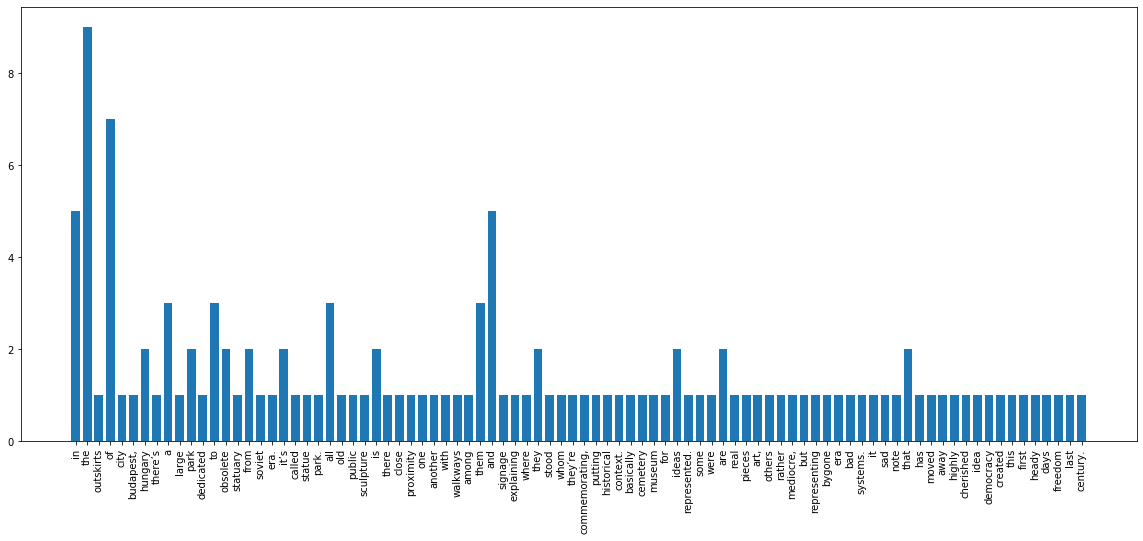

In [164]:
import matplotlib.pyplot as plt
import numpy as np

#increasing size of the chart
plt.figure(figsize=(20,8))

#plotting keys
keys = frequency.keys()
values = frequency.values()

#chart
freqVis = plt.bar(keys, values,width=.75 )
plt.xticks(rotation = 90)

plt.show()